In [258]:
import PseudoNetCDF as pnc
import pycno
import matplotlib.pyplot as plt
import os

In [2]:
cf = pnc.pncopen('output/ne_10m_admin_0_countries.ADM0_A3.108NHEMI2.nc', format='ioapi')

In [246]:
[(var.NAME_EN, key) for key, var in cf.variables.items() if key != 'TFLAG' and 'Port' in var.NAME_EN]

/home/bhenders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


[('Portugal', 'PRT')]

In [215]:
outcntrys = {
    "REGION_SEA": ([
        "IDN", "MYS", "SGP", "THA", "VNM", "MMR", "KHM", "LAO",
        "BRN", "PGA", "PHL", "SCR"
    ], 'Southeast Asia'),
    "REGION_EUR": ([
        "CYP", "FRA", "LTU", "CZE", "DEU", "EST", "LVA", "SWE",
        "FIN", "LUX", "BEL", "ESP", "DNK", "ROU", "HUN", "SVK",
        "POL", "IRL", "GRC", "AUT", "ITA", "NLD", "HRV", "SVN",
        "BGR", "PRT", "MLT", "GBR", "NOR", "CHE", "BIH", "MNE",
        "ALB", "SRB", "MKD", "KOS", "TUR", "GEO", "AZE", "MDA",
        "ARM", "CYN", "CNM", "SMR", "ALD", "AND", "GGY",
        "IMN", "JEY", "VAT", "LIE", "MCO", "WSB", "ESB", "FRO",
        "ISL"
    ], 'Europe'),
    "REGION_IND": ([ "IND" ], 'India'),
    "REGION_CHN": ([ "CHN" ], 'China'),
    "REGION_MDE": ([
        "ISR", "LBN", "SYR", "OMN", "ARE", "IRQ", "IRN", "QAT",
        "SAU", "JOR", "YEM", "BHR", "KWT", "PSX"
    ], 'Middle East'),
    "REGION_SAS":    ([ "PAK", "BGD", "AFG", "NPL", "LKA", "BTN", "KAS", "IND" ], 'Southern Asia'),
    "REGION_OTHSAS": ([ "PAK", "BGD", "AFG", "NPL", "LKA", "BTN", "KAS" ], 'Non India Southern Asia'),
    "REGION_EAS":    ([ "KOR", "PRK", "JPN", "MNG", "HKG", "MAC", "TWN", "CHN" ], 'Eastern Asia'),
    "REGION_OTHEAS": ([ "KOR", "PRK", "JPN", "MNG", "HKG", "MAC", "TWN" ], 'Non China Eastern Asia'),
    "REGION_RBU": ([ "UKR", "BLR", "RUS" ], 'Russia, Belarus, Ukraine'),
    "REGION_CAS": ([ "UZB", "KAZ", "TJK", "KGZ", "TKM", "KAB" ], 'Central Asia'),
    "REGION_USA": (["USA",], 'USA and Islands'),
    "REGION_USAMI": (["UMI", "BMU"], 'USA Non Carribean Islands'),
    "REGION_CAN": (["CAN"], 'Canada'),
    "REGION_MEX": (["MEX"], 'Mexico'),
    "REGION_MCA": ([
        "MEX", "AIA", "ATG", "BHS", "BLM", "CUB", "CYM", "DMA",
        "DOM", "HTI", "JAM", "KNA", "MAF", "MSR", "PRI", "SXM", "TCA",
        "USG", "VGB", "ABW", "BJN", "BLZ", "CRI", "GTM", "HND", "NIC",
        "PAN", "SER", "SLV", "COL", "CUW", "VEN", "VIR"
    ], "Mexico and Central America"),
    "REGION_NAM": (["CAN", "USA", ], 'Northern America'),
}

In [216]:
usedcntrys = []
outcntrys['OTHER'] = ([], 'Other')
for key, (vals, vardesc) in outcntrys.items():
    if not key.startswith('REGION_OTH'):
        usedcntrys.extend(vals)

for key in cf.variables:
    if key != 'TFLAG' and key not in usedcntrys:
        outcntrys['OTHER'][0].append(key)
outcntrys['OTHER'][0].sort()


In [217]:
for cntry in set(usedcntrys):
    if usedcntrys.count(cntry) > 1:
        print(cntry, usedcntrys.count(cntry))

IND 2
CHN 2
USA 2
CAN 2
MEX 2


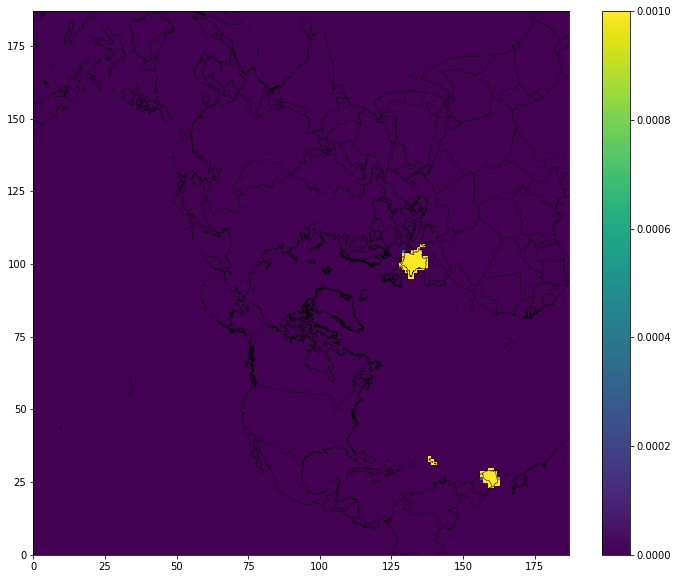

In [251]:
for lookkey in ['FRA']:
    plt.figure(figsize=(12, 10))
    plt.pcolormesh(cf.variables[lookkey][0, 0], vmax=0.001)
    plt.colorbar()
    cno.draw()


In [236]:
outdefn = "\n".join([f'{key} = {" + ".join(vals)}\n{key}.units = "1               "\n{key}.long_name = "{key.ljust(16)}"\n{key}.var_desc = "{vardesc.ljust(16)}"' for key, (vals, vardesc) in outcntrys.items()])
outdefn += "\nREGION_EUR[0, 0, :50, :] = 0"
print(outdefn)

REGION_SEA = IDN + MYS + SGP + THA + VNM + MMR + KHM + LAO + BRN + PGA + PHL + SCR
REGION_SEA.units = "1               "
REGION_SEA.long_name = "REGION_SEA      "
REGION_SEA.var_desc = "Southeast Asia  "
REGION_EUR = CYP + FRA + LTU + CZE + DEU + EST + LVA + SWE + FIN + LUX + BEL + ESP + DNK + ROU + HUN + SVK + POL + IRL + GRC + AUT + ITA + NLD + HRV + SVN + BGR + PRT + MLT + GBR + NOR + CHE + BIH + MNE + ALB + SRB + MKD + KOS + TUR + GEO + AZE + MDA + ARM + CYN + CNM + SMR + ALD + AND + GGY + IMN + JEY + VAT + LIE + MCO + WSB + ESB + FRO + ISL
REGION_EUR.units = "1               "
REGION_EUR.long_name = "REGION_EUR      "
REGION_EUR.var_desc = "Europe          "
REGION_IND = IND
REGION_IND.units = "1               "
REGION_IND.long_name = "REGION_IND      "
REGION_IND.var_desc = "India           "
REGION_CHN = CHN
REGION_CHN.units = "1               "
REGION_CHN.long_name = "REGION_CHN      "
REGION_CHN.var_desc = "China           "
REGION_MDE = ISR + LBN + SYR + OMN + ARE + IRQ + IRN

In [255]:
tmpf = cf.subset(list(cf.variables))
tmpf.SDATE = 1970001
outf = tmpf.eval(outdefn)
outf.updatemeta()
outf.updatetflag(overwrite=True)
outf.variables.move_to_end('TFLAG', last=False)

In [260]:
outpath = 'output/ne_10m_admin_0_countries.ADM0_A3.108NHEMI2.HTAPTier1.nc'
if os.path.exists(outpath):
    os.remove(outpath)
diskf = outf.save('output/ne_10m_admin_0_countries.ADM0_A3.108NHEMI2.HTAPTier1.nc', format='NETCDF4_CLASSIC', complevel=1, verbose=0)
diskf.close()

In [238]:
cno = pycno.cno(outf.getproj(withgrid=True))

**PNC:/home/bhenders/.local/lib/python3.6/site-packages/PseudoNetCDF/pncwarn.py:24:UserWarning:
  Currently not using:straight_vertical_longitude_from_pole -98.0


REGION_USAMI


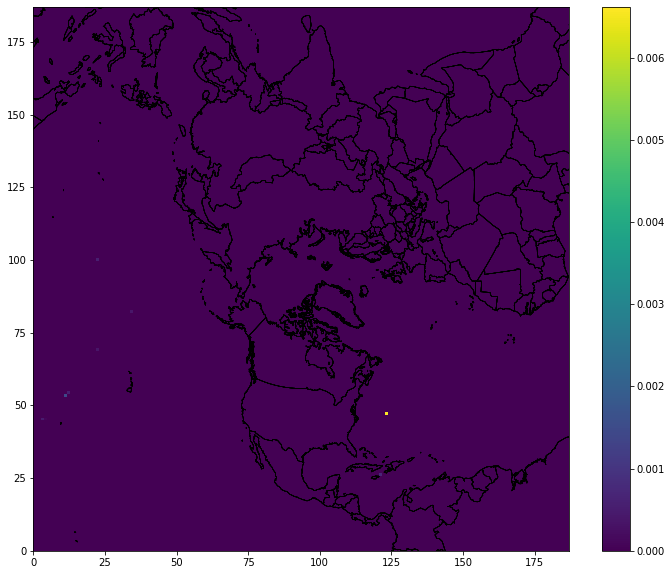

REGION_USAMI USA Non Carribean Islands next 


In [262]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
regkeys = sorted([k for k in outf.variables if k != 'TFLAG'])
ci = 0
d = ''
cax = None
while ci < len(regkeys):
    regk = regkeys[ci]
    rvar = outf.variables[regk]
    rval = rvar[0, 0]
    print(regk)
    if rval[:, :].sum() != 0:
        p = ax.pcolormesh(rval)
        cno.draw(ax=ax)

        cbar = plt.colorbar(p, cax=cax)
        cax = cbar.ax
        display(fig)
        d = input(f'{regk} {rvar.var_desc} next')
        del fig.axes[0].collections[0]
        cax.cla()
    
    if d == 'q':
        break
    elif d in ('p',):
        ci -= 1
    else:
        ci += 1
    
    clear_output(wait=True)
plt.close(fig)

In [211]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
cntrys = sorted(outcntrys['OTHER'][0])
ci = 0
d = ''
cax = None
while ci < len(cntrys):
    cntry = cntrys[ci]
    cvar = tmpf.variables[cntry]
    cval = cvar[0, 0]
    print(cntry)
    if cval[170:187, 0:25].sum() != 0:
        p = ax.pcolormesh(cval)
        cno.draw(ax=ax)

        cbar = plt.colorbar(p, cax=cax)
        cax = cbar.ax
        display(fig)
        d = input(f'{cntry} {cvar.NAME_EN} next')
        del fig.axes[0].collections[0]
        cax.cla()
    
    if d == 'q':
        break
    elif d in ('p',):
        ci -= 1
    else:
        ci += 1
    
    clear_output(wait=True)
plt.close(fig)

ZWE


In [120]:
hf = pnc.pncopen('/work/ROMO/global/emissions/HTAPv2/regions/HTAP_Phase2_tier2NC01x01_v2.nc', format='netcdf')

/home/bhenders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  import sys
/home/bhenders/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Use the colorbar set_ticks() method instead.
  if __name__ == '__main__':


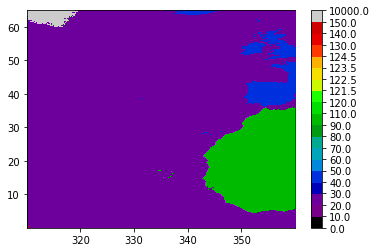

In [250]:
cmap, norm = plt.matplotlib.colors.from_levels_and_colors([0, 70.5, 71.5, 72.5, 73.5, 10000], ['k', 'b', 'g', 'y', 'r'])
cmap = 'nipy_spectral'
norm = plt.matplotlib.colors.BoundaryNorm([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 110, 120, 121.5, 122.5, 123.5, 124.5, 130, 140, 150, 10000], 256)
islice = slice(0, 400)
islice = slice(-500, None)
jslice = slice(250, 900)
plt.pcolormesh(hf.variables['long'][islice], hf.variables['lat'][jslice], hf.variables['region_code'][jslice, islice], cmap=cmap, norm=norm)
plt.colorbar(ticks=norm.boundaries)
plt.gcf().axes[1].set_yticks(norm.boundaries)
plt.gcf().axes[1].set_yticklabels([f'{b:.1f}' for b in norm.boundaries]);